In [1]:
#Aqui instalo los sonidos, microfonos, busquedas, librerias.

In [2]:
pip install playsound

In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gTTS

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install google

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install mariadb

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install googlesearch-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Importo las librerias necesarias

In [12]:
from gtts import gTTS

In [13]:
from playsound import playsound

In [14]:
import speech_recognition as sr

In [15]:
import pyttsx3

In [34]:
import mysql.connector as mariadb
from IPython.display import Image


In [17]:
from itertools import chain



In [18]:
from datetime import date
from datetime import datetime


In [19]:
#from nltk.corpus import wordnet

In [20]:
import requests

In [21]:
from tkinter import *

In [22]:
import math

In [56]:
ciudad='Madrid,ES'
api_key="e7cdb6db20d94db83272aa82c77b946a"

In [66]:
def get_weather(api_key,ciudad):
    url=f"http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}"
    response=requests.get(url).json()
    temp= response['main']['temp']
    #parsea a celsius
    temp=(temp*1.8)- 459.67
    temp= math.floor((temp))
    vozAsistente('Estamos a '+str(temp)+' grados')
    #print(response)

In [25]:
#activo el reconocedor de voz

In [26]:
r= sr.Recognizer()

In [27]:
#activamos el microfono y cargamos el texto dicho
def activarMicrofono():
    with sr.Microphone() as source:
        print("Di algo:")
        #redusco el sonido del exterior, permite que la lectura sea mas eficiente.
        r.adjust_for_ambient_noise(source,duration=1)

        audio=r.listen(source)
        try:
            #configuro el lenguaje a español panama
            text=r.recognize_google(audio,language='es-PA')
            palabra_usuario=text
            print('Has dicho: {}'.format(text))
        except:
            palabra_usuario="error"
            vozAsistente("Uy, lo siento no pude reconocer tu voz")
           
            
    return palabra_usuario

In [28]:
#activa la voz de la asistente
def vozAsistente(texto):
    engine=pyttsx3.init()
    engine.setProperty("rate",150)

    engine.say(texto)
    engine.runAndWait()

In [29]:
from googlesearch import search
#busqueda en internet por voz
def iniciarBusqueda():
    vozAsistente('¿Que deseas buscar?')
    google_query=activarMicrofono()
    vozAsistente('Estas son las paginas encontradas')
    for j in search(google_query, tld="co.in", num=10, stop=10, pause=2):
         print(j)

In [30]:
#Coneccion con bbdd

In [31]:
#conexion que permite cuestionar a la asistente cosas personales
def conexionBBDD():
    print("intentando mostrar datos:")
    mariadb_conexion = mariadb.connect(host='2.139.176.212', port='3306',
                                   user='db_aDobras', password='DobrAs:33', database='bddobras')
    cursor = mariadb_conexion.cursor()
    pregunta_usuario=activarMicrofono()
    try:
        #no se si cambiar el where por like, asi habra mas probabilidad de respuesta
        #opcion: ponerle like y que lance que no entendio muy bien pero aqui algunas respuestas
        consulta="SELECT id_,pregunta,respuesta FROM asistentevirtual WHERE pregunta= %s"
        valor=(pregunta_usuario,)
        cursor.execute(consulta,valor)
       
        for id_, pregunta,respuesta in cursor:
            print("intentando cargar datos:")
           
            vozAsistente( respuesta)
            print("Datos cargados exitosamente!")
     
        # """  if len(resultado)== 0:
           # vozAsistente( 'Nunca me habías echo esa pregunta, ¿Quieres que te responda algo en especial?')
           # crear=activarMicrofono()
           # if(crear=='si'):
                #crearPregunta(pregunta_usuario)
           # elif(crear=='no'):
               # vozAsistente( 'Vale!')
                #"""
    except mariadb.Error as error:
        print("Error: {}".format(error))
    mariadb_conexion.close()

In [32]:
# Permite crear nuevas preguntas.
def crearPregunta(pregunta_usuario):
    
            mariadb_conexion = mariadb.connect(host='2.139.176.212', port='3306',user='db_aDobras', password='DobrAs:33', database='bddobras')
            cursor = mariadb_conexion.cursor()
            vozAsistente( 'Muy Bien!, Define '+pregunta_usuario)

            respuestaNueva=activarMicrofono()
            try:
                consulta="INSERT INTO bddobras.asistentevirtual(pregunta, respuesta) VALUES (%s, %s)"
                valor=(pregunta_usuario,respuestaNueva,)
                cursor.execute(consulta,valor)
            except mariadb.Error as error:
                print("Error: {}".format(error))
            mariadb_conexion.close()


Estas es mi tabla de Busquedas:

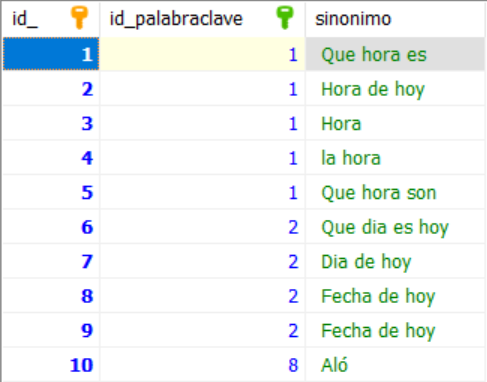

In [35]:
Image(filename='CapturaBusquedas.PNG')

Esta es mi tabla de Palabras clave que retornaran el valor a buscar

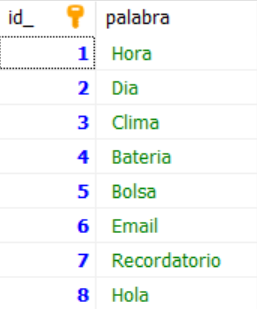

In [36]:
Image(filename='ImagenPalabrasClave.PNG')

In [52]:
def identificarPalabras(palabraRecreada):
    #Lo que hare es: buscar en
    mariadb_conexion = mariadb.connect(host='2.139.176.212', port='3306',user='db_aDobras', password='DobrAs:33', database='bddobras')
    cursor = mariadb_conexion.cursor()
    try:
        consulta="SELECT id_palabraclave,sinonimo FROM Busquedas WHERE sinonimo= %s"
        valor=(palabraRecreada,)
        cursor.execute(consulta,valor)
        #Aqui hare una busqueda dentro de la busqueda
        #Recorro los sinonimos, al encontrarlo sacamos el id_palabraclave
        for id_palabraclave, sinonimo in cursor:
            print("Identificando frase")

            identificarClave(id_palabraclave)
    except mariadb.Error as error:
        print("Error: {}".format(error))
    mariadb_conexion.close()


In [53]:
def identificarClave(clave_id):
    mariadb_conexion = mariadb.connect(host='2.139.176.212', port='3306',user='db_aDobras', password='DobrAs:33', database='bddobras')
    cursor = mariadb_conexion.cursor()
    try:
        consulta="SELECT id_,palabra FROM Palabras WHERE id_= %s"
        valor=(clave_id,)
        cursor.execute(consulta,valor)
        #Buscamos el id de la clave encontrado, conseguimos clave


        for id_,palabra in cursor:
            print("Mostrando consulta")
            #Razones por las que es importante saber la palabra clave: 
            # considero que con la palabra clave podre ingresar un menu de acciones que se pueden hacer de manera generalizada

            interaccionUsuario(palabra)
            print("Datos cargados exitosamente!")
    except mariadb.Error as error:
        print("Error: {}".format(error))
    mariadb_conexion.close()


In [42]:
#Menu de interacciones
def interaccionUsuario(palabra):
    now = datetime.now()
    if(palabra=='Hola'):
        vozAsistente('Hola, ¿Como estas?')
    if (palabra=='Hora'  ):
        vozAsistente('Son las '+ str(now.hour)+' y '+str(now.minute))
    if(palabra=='Dia'):
         vozAsistente('Es '+ str(now.strftime('%A'))+', '+str(now.strftime('%w'))+' de '+str(now.strftime('%B'))+' del '+str(now.strftime("%Y")))
    if(palabra=='Clima'):
         get_weather(api_key,ciudad)

In [ ]:
palabra_usuario= activarMicrofono()
#buscamos cosas por internet
if (palabra_usuario == 'buscar'):
    iniciarBusqueda()
#holamundo de la api
if(palabra_usuario=='hola'):
    vozAsistente('Hola, ¿Como estas?')
#realizo preguntas a la asistente
if(palabra_usuario=='pregunta'):
    vozAsistente('¿Que pregunta me quieres hacer?')
    conexionBBDD()
#tengo que ponerlo en un bucle, marcado error.
#devuelve error si no escucha correctamente
if(palabra_usuario=='error'):
    vozAsistente('¿Podrias repetirme lo que dijiste?')
    activarMicrofono()
if (palabra_usuario=='qué hora es'  ):
    now = datetime.now()
    vozAsistente('Son las '+ str(now.hour)+' y '+str(now.minute))
  
   

In [67]:
palabra_usuario= activarMicrofono()
identificarPalabras(palabra_usuario)

Di algo:
Has dicho: clima
Identificando frase
Mostrando consulta
Datos cargados exitosamente!
